In [9]:
import os

In [10]:
import numpy as np
from scipy.spatial import KDTree

# here is cells to read files

## chage to directory of dataset

In [11]:
data_path = "../data/pointclouds"
data_files = os.listdir(data_path)

## iterate each sample files and label it

000 - 099: building
100 - 199: car
200 - 299: fence
300 - 399: pole
400 - 499: tree

In [12]:
points_cluster_label=[]
points_cluster_kdtree = []
def read_data(cluster_label,point_cluster,file,data_path):
    file_path = data_path+"/"+file
    #print(file_path)
    #print(os.getcwd())
    
    with open(file_path,'r',encoding='utf-8') as f:
        line_points = f.readlines()
        inserted_point = []
        
        file_code = file.split(".")[0]
        file_code = int(file_code)
        # label it according to the index of files
        file_label = file_code//100
        for one_line in line_points:
            x,y,z = [float(coord) for coord in one_line.strip().split(" ")]
            #print(file,one_line)
            inserted_point.append([x,y,z])
        #print(inserted_point)
        # store data structure is kdtree
        one_tree = KDTree(np.array(inserted_point))
        
        cluster_label.append(file_label)
        point_cluster.append(one_tree)
for file in data_files:
    # notice that data_files is a list of file names and this function open one .xyz file 
    read_data(points_cluster_label,points_cluster_kdtree,file,data_path)
    
print(len(points_cluster_label))
print(len(points_cluster_kdtree))

500
500


# visualize the points

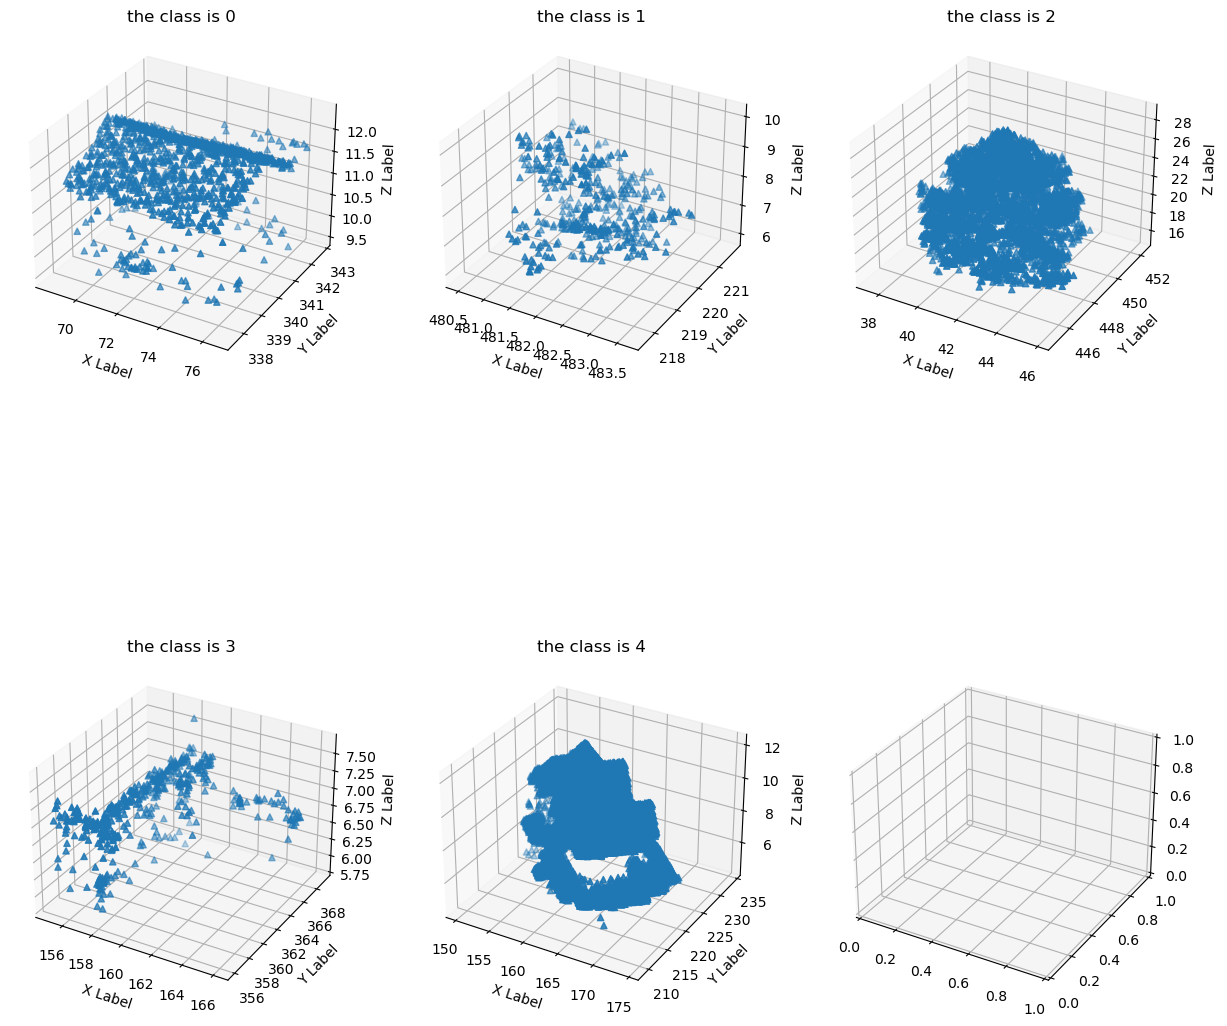

In [47]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(
    2, 3, figsize=(15,15), subplot_kw={'projection': '3d'})

for i in range(5):
    if i<3:
        ax = ax1[i]
    else:
        ax = ax2[i%3]
    points = points_cluster_kdtree[i*100].data
    xs,ys,zs = points[:,0],points[:,1],points[:,2]
    ax.scatter(xs, ys, zs, marker='^')
    ax.set_title('the class is {}'.format(i),)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.show()



    



In [48]:
#some thing we may use
points_label=[]
points_features=[]
points_eigenvalues=[]
cluster_eigenvalues=[]
sample_labels=[]

# start to extract values

In [50]:
def extract_cluster_eigenvalues(points_cluster_kdtree,points_cluster_label,\
                               sample_labels,cluster_eigenvalues):
    # read from samples
    for OneTree,label in zip(points_cluster_kdtree,points_cluster_label):
        # select points
        selected_points = OneTree.data
        # calcualte lambda 1,2 and 3
            
        cov_martrix = np.cov(selected_points,rowvar=False)
            
        eigen_values = np.linalg.eigvals(cov_martrix)
        eigen_values.sort()
        eigen_values= list(eigen_values)
        lambda1,lambda2,lambda3 = eigen_values
        #eigen_values.append((lambda3-lambda2)/lambda3)
        #eigen_values.append((lambda2-lambda1)/lambda3)
        #eigen_values.append((lambda1)/lambda3)
        # get bounding box
        Z_RANGE = max(selected_points[:,2])-min(selected_points[:,2])
        Y_RANGE =max(selected_points[:,1])-min(selected_points[:,1])
        X_RANGE =max(selected_points[:,0])-min(selected_points[:,0])
        eigen_values+=list(cov_martrix[0])
        eigen_values.append(Z_RANGE)
        eigen_values.append(X_RANGE)
        eigen_values.append(Y_RANGE)
        # store one sample's feature
        
        cluster_eigenvalues.append(eigen_values)
            
        sample_labels.append(label)
extract_cluster_eigenvalues(points_cluster_kdtree,points_cluster_label,\
                               sample_labels,cluster_eigenvalues)
import pickle
# store features
with open("../data"+"/"+"cluster_eigenvalues.txt",'wb') as sf:
    pickle.dump(cluster_eigenvalues, sf, pickle.HIGHEST_PROTOCOL)  
# store labels
with open("../data"+"/"+"cluster_labels.txt",'wb') as sf:
    pickle.dump(sample_labels, sf, pickle.HIGHEST_PROTOCOL)

In [51]:
len(sample_labels)

500

# visualize the distribution of data

## try to visualize it in 3d mode, the effect is not good

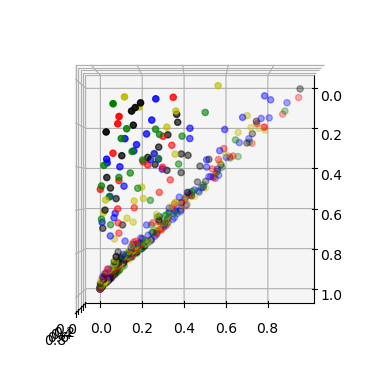

In [125]:
ax = plt.figure().add_subplot(projection='3d')
cluster_eigenvalues = np.array(cluster_eigenvalues)
x = cluster_eigenvalues[:,0]
y = cluster_eigenvalues[:,1]
z = cluster_eigenvalues[:,2]
colors = ('r', 'g', 'b', 'k','y')
c_list = []
for color in colors:
    c_list+=[color]*100
ax.scatter(x, y, z, zdir='z', c=c_list, label='points in shape orientation dimension')


## seperately to check each features

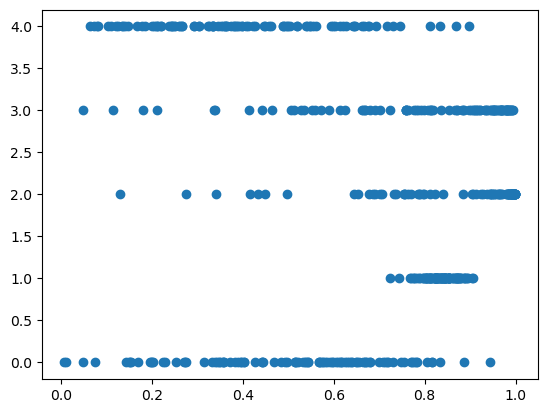

In [116]:
fig = plt.figure()
cluster_eigenvalues = np.array(cluster_eigenvalues)
x = cluster_eigenvalues[:,0]
plt.scatter(x, sample_labels, label='points in shape orientation dimension')

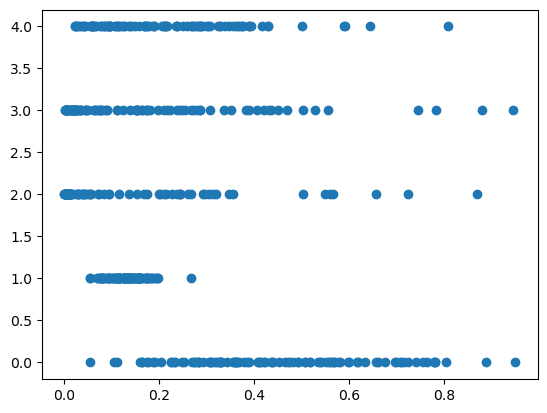

In [117]:
fig = plt.figure()
cluster_eigenvalues = np.array(cluster_eigenvalues)
x = cluster_eigenvalues[:,1]
plt.scatter(x, sample_labels, label='points in shape orientation dimension')

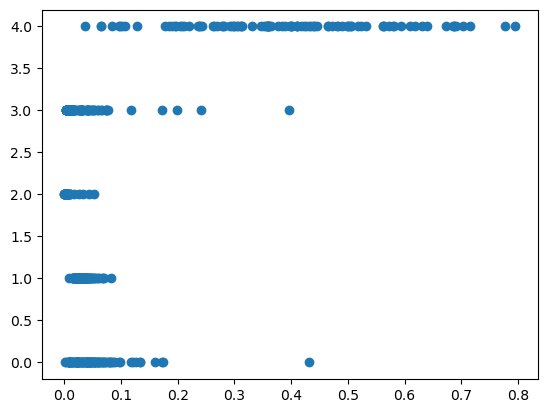

In [118]:
fig = plt.figure()
cluster_eigenvalues = np.array(cluster_eigenvalues)
x = cluster_eigenvalues[:,2]
plt.scatter(x, sample_labels, label='points in shape orientation dimension')

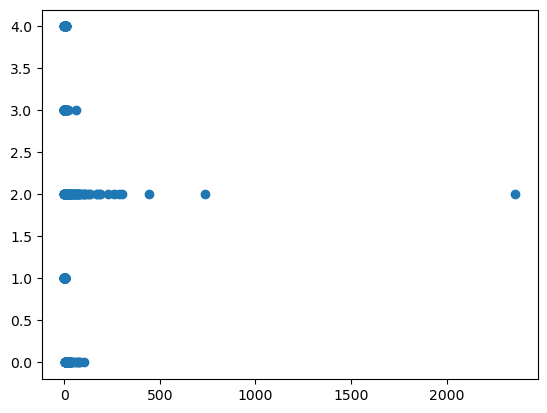

In [119]:
fig = plt.figure()
cluster_eigenvalues = np.array(cluster_eigenvalues)
x = cluster_eigenvalues[:,3]
plt.scatter(x, sample_labels, label='points in shape orientation dimension')

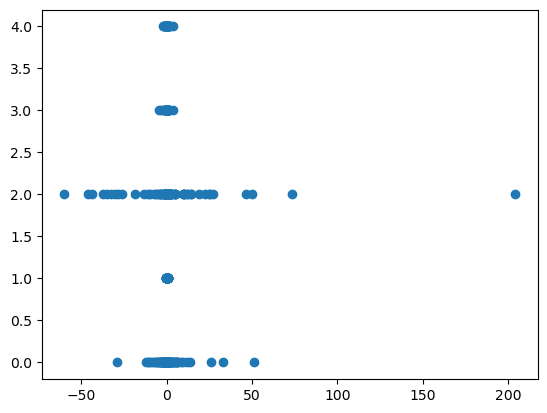

In [120]:
fig = plt.figure()
cluster_eigenvalues = np.array(cluster_eigenvalues)
x = cluster_eigenvalues[:,4]
plt.scatter(x, sample_labels, label='points in shape orientation dimension')

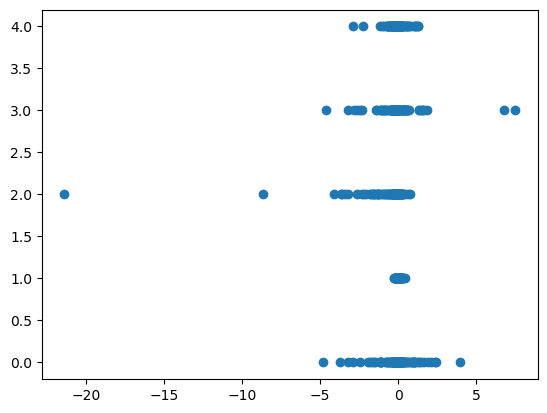

In [121]:
fig = plt.figure()
cluster_eigenvalues = np.array(cluster_eigenvalues)
x = cluster_eigenvalues[:,5]
plt.scatter(x, sample_labels, label='points in shape orientation dimension')